In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split

# Chargement des données
iris = datasets.load_iris()
X, y = iris.data, iris.target
# On conserve 50% du jeu de données pour l'évaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

# la classification de la base de données iris avec un noyau gaussien (rbf)
clf = svm.SVC(C=1.0, kernel='rbf', gamma=0.25)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)



1.0

Text(0.5, 1.0, 'SVM RBF')

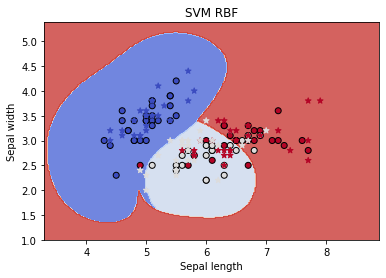

In [13]:
X, y = iris.data[:,:2], iris.target
# On conserve 50% du jeu de données pour l'évaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

clf = svm.SVC(C=1.0, kernel='rbf', gamma=2)
clf.fit(X_train, y_train)

# Pour afficher la surface de décision on va discrétiser l'espace avec un pas h
h = .02
# Créer la surface de décision discretisée
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Surface de décision
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
# Afficher aussi les points d'apprentissage
plt.scatter(X_train[:, 0], X_train[:, 1], label="train", edgecolors='k', c=y_train, cmap=plt.cm.coolwarm)
plt.scatter(X_test[:, 0], X_test[:, 1], label="test", marker='*', c=y_test, cmap=plt.cm.coolwarm)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title("SVM RBF")

In [7]:
from sklearn.model_selection import GridSearchCV
C = 0.9 # paramètre de régularisation
X, y = iris.data, iris.target
# On conserve 50% du jeu de données pour l'évaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
lin_svc = svm.LinearSVC(C=C)

param_grid = [
    {'kernel': ['rbf'], 'gamma': ['auto', 'scale', 0.5, 1, 2], 'C': [0.5, 0.8, 0.9, 1,2 ]},
    {'kernel': ['poly'], 'degree': [1, 2, 3], 'C': [0.5, 0.8, 0.9, 1,2]},
    {'kernel': ['linear'], 'C': [0.5, 0.8, 0.9, 1,2]}
]
clf = GridSearchCV(svm.SVC(), param_grid, cv=3, n_jobs=4, verbose=1)
clf.fit(X_train, y_train)
print(clf.best_params_)
clf.score(X_test, y_test)

Fitting 3 folds for each of 45 candidates, totalling 135 fits
{'C': 0.5, 'gamma': 2, 'kernel': 'rbf'}


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 135 out of 135 | elapsed:    0.0s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.9466666666666667